# Customer Segmentation using K-Means Clustering

##### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis (EDA)

Checking missing values

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualize the distribution of key features

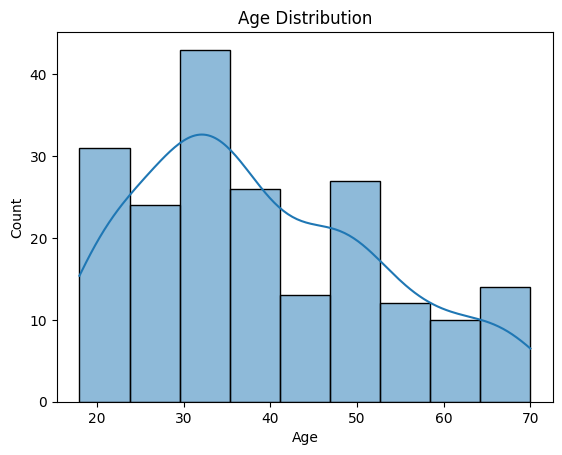

In [11]:
#Age Distribution
sns.histplot(df['Age'], kde = True)
plt.title('Age Distribution')
plt.show()

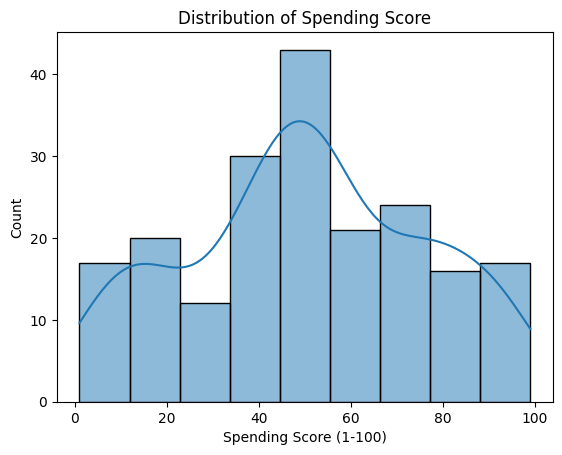

In [13]:
#Spending score Distribution
sns.histplot(df['Spending Score (1-100)'], kde = True)
plt.title('Distribution of Spending Score')
plt.show()

##### Checking correlations

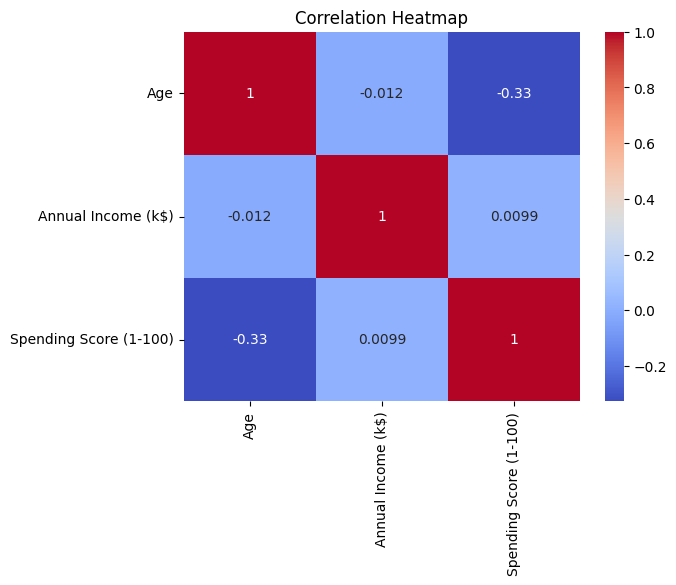

In [20]:
correlation = df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

An exploratory analysis was conducted to understand the relationships between the features. A correlation heatmap was used to analyze the correlations between Age, Annual Income, and Spending Score. The analysis showed no significant correlations between the features, indicating that they represent different aspects of customer data. Visualizations were also created to examine the distribution of each feature.

## Data Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
#converting to dataframe
df_scaled = pd.DataFrame(df_scaled, columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


The Mall Customers dataset was loaded and explored. The dataset contains features such as Age, Annual Income (k$), and Spending Score (1-100). The data was cleaned by handling missing values, and the numerical features were scaled using StandardScaler to standardize the data. This scaling step was essential since K-Means Clustering is sensitive to the scale of the features.

## K-Means Clustering

In [21]:
from sklearn.cluster import KMeans

In [31]:
#elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

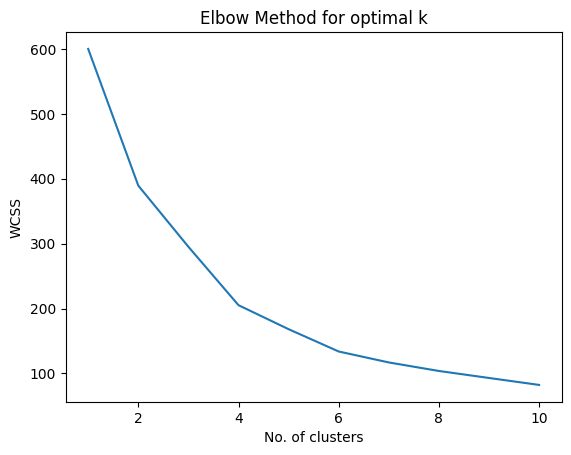

In [32]:
#plotting
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for optimal k')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Apply K-Means with k = 4


In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
df['Cluster'] = df['Cluster'].astype('category')
df.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
5,6,Female,22,17,76,2
6,7,Female,35,18,6,0


The K-Means Clustering algorithm was applied to segment customers into clusters based on their Age, Annual Income, and Spending Score. The Elbow Method was used to determine the optimal number of clusters, which was found to be 4. After determining the ideal number of clusters, the K-Means model was trained on the scaled data to group the customers

C:\Users\dsaje\AppData\Local\Temp\ipykernel_2652\2304123982.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2],


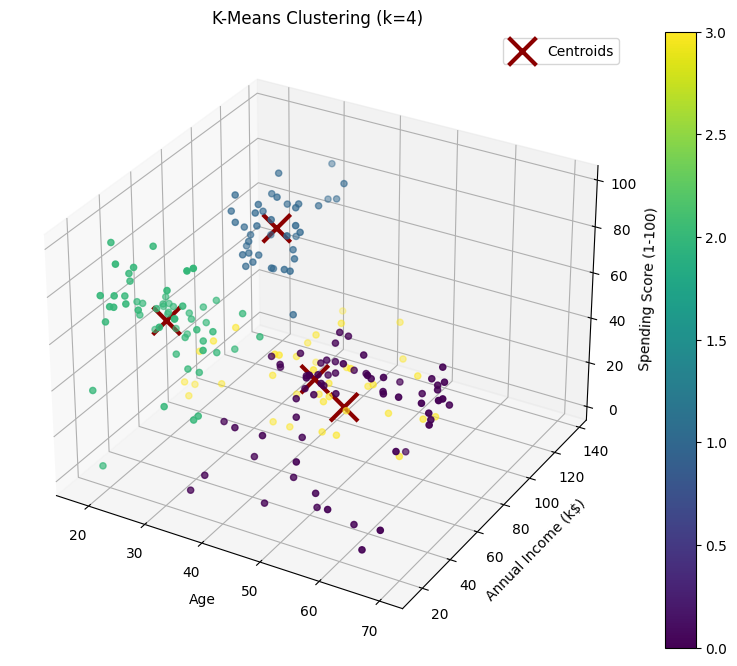

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Get the scaled centroids
centroids_scaled = kmeans.cluster_centers_

# Inverse transform the centroids to the original scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
scaler.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
centroids_original = scaler.inverse_transform(centroids_scaled)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')

ax.scatter(centroids_original[:, 0], centroids_original[:, 1], centroids_original[:, 2], 
           c='#8B0000', s=400, marker='x', edgecolor='black', linewidth=3, label='Centroids', alpha=1)

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

# Title
ax.set_title('K-Means Clustering (k=4)')

# Add color bar for cluster labels
fig.colorbar(scatter)

# Show the legend
ax.legend()

plt.show()


After clustering, the centroids of the clusters were visualized in a 3D plot. These centroids represent the center of each cluster in the feature space, using Age, Annual Income, and Spending Score. The 3D plot helped in visualizing how customers were grouped based on these three features and where the central points of each group were located. The centroids were marked with red "X" symbols to distinguish them from the other points.

In [48]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Display the centroids for each cluster
centroid_df = pd.DataFrame(centroids, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(centroid_df)

        Age  Annual Income (k$)  Spending Score (1-100)
0  1.086161           -0.490565               -0.397174
1 -0.428806            0.974847                1.216085
2 -0.962492           -0.784763                0.392030
3  0.037205            0.990115               -1.188757


In [49]:
# Group the data by the cluster label and get the mean of each feature
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


After applying the K-Means clustering algorithm, a summary of each cluster was generated by calculating the mean values of Age, Annual Income, and Spending Score within each cluster. This helped to identify patterns and characteristics within the customer segments, providing valuable insights for targeted marketing or further business strategies.

##### Cluster Interpretation:

##### Cluster 0:

Age: 53.98,
Annual Income: 47.71k$,
Spending Score: 39.97,
This cluster represents older individuals with a moderate income and relatively low spending behavior. They may focus on essential purchases or have a more conservative spending pattern.
##### Cluster 1:

Age: 32.88,
Annual Income: 86.10k$,
Spending Score: 81.53,
This group consists of younger, high-income customers who are willing to spend more, indicating a preference for discretionary or luxury products. They likely represent a dynamic, modern consumer segment.
##### Cluster 2:

Age: 25.44,
Annual Income: 40.00k$,
Spending Score: 60.30,
A younger group with lower income but a relatively higher spending score. These customers may be early in their careers, with a propensity to spend more despite lower earnings.
##### Cluster 3:

Age: 39.37,
Annual Income: 86.50k$,
Spending Score: 19.58,
This cluster consists of middle-aged, high-income individuals with a low spending score, indicating that they may focus more on savings or investments rather than discretionary spending.


C:\Users\dsaje\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


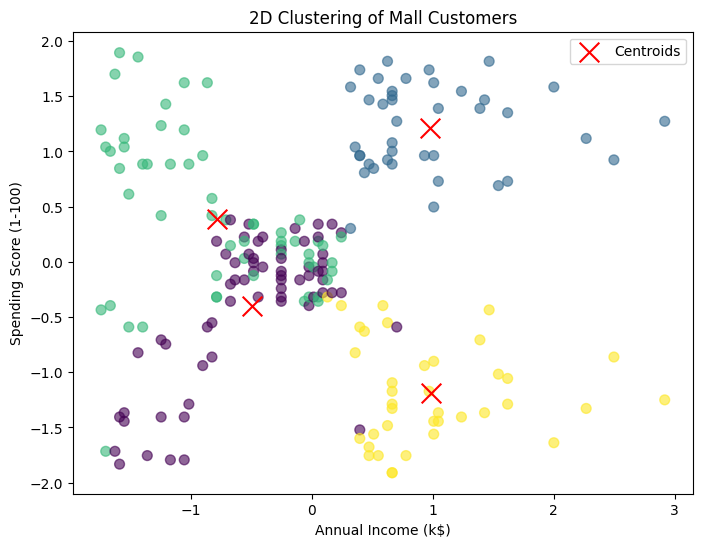

In [60]:
# If you scaled the data, use the same scaler for the centroids
centroids_scaled = scaler.transform(centroids_original)

# Plot the clusters and scaled centroids
plt.figure(figsize=(8, 6))

# Scatter plot for clusters (scaled data)
plt.scatter(df_scaled[:, 1], df_scaled[:, 2], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)

# Plotting the scaled centroids
plt.scatter(centroids_scaled[:, 1], centroids_scaled[:, 2], c='red', s=200, marker='x', label='Centroids')

# Labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('2D Clustering of Mall Customers')
plt.legend()
plt.show()



A final 2D plot was generated to visualize the clusters and their centroids. The plot clearly displayed the customer segments and their relationships in the Annual Income and Spending Score feature space. The centroids were marked to show the central points of each cluster, making it easier to interpret the distribution of the customer segments.